<a href="https://colab.research.google.com/github/yaznhijazii/ML/blob/main/Stroke_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Patern recognition project** by
*Yazan Hijazi*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
stroke = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
stroke.shape

(5110, 12)

In [ ]:
strokes = stroke.drop('id', axis=1)
strokes.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
strokes['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
strokes['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
strokes['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
strokes['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
strokes['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

<Axes: xlabel='gender', ylabel='count'>

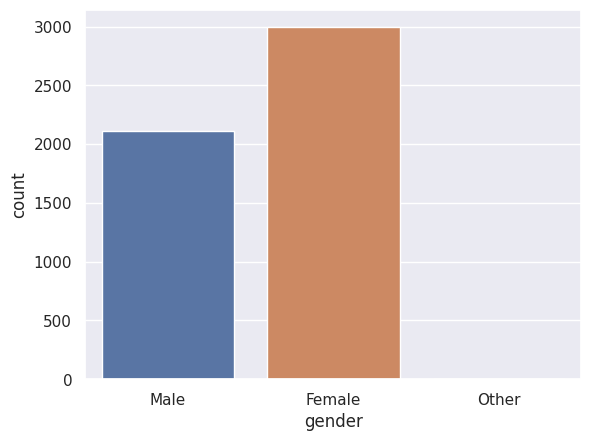

In [ ]:
sns.countplot(x = strokes['gender'])

<Axes: xlabel='ever_married', ylabel='count'>

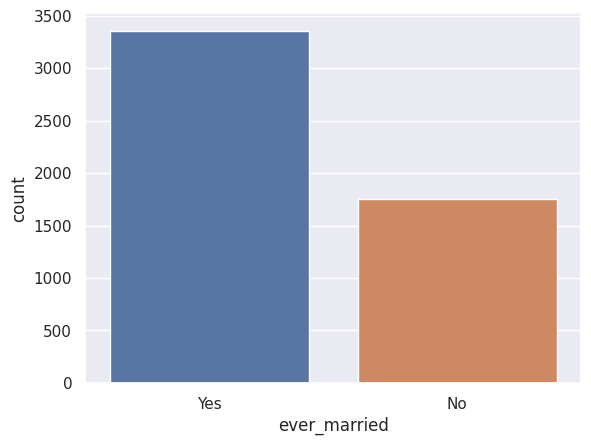

In [ ]:
sns.countplot(x = strokes['ever_married'])

<Axes: xlabel='work_type', ylabel='count'>

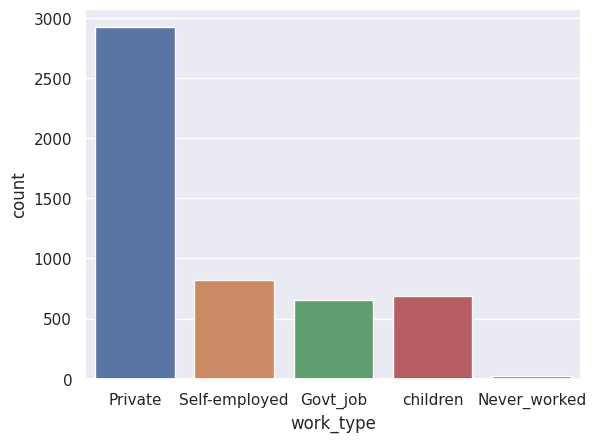

In [ ]:
sns.countplot(x = strokes['work_type'])

<Axes: xlabel='Residence_type', ylabel='count'>

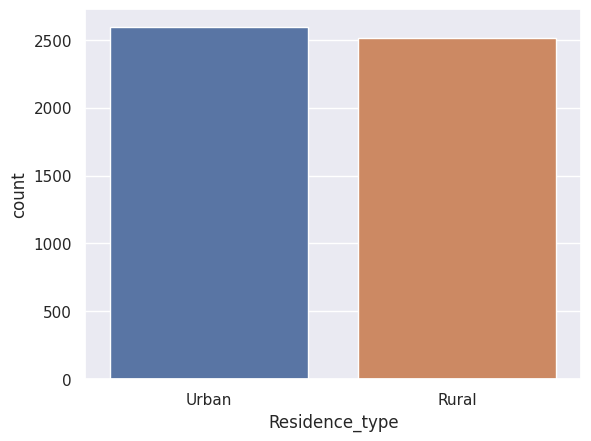

In [ ]:
sns.countplot(x = strokes['Residence_type'])

<Axes: xlabel='smoking_status', ylabel='count'>

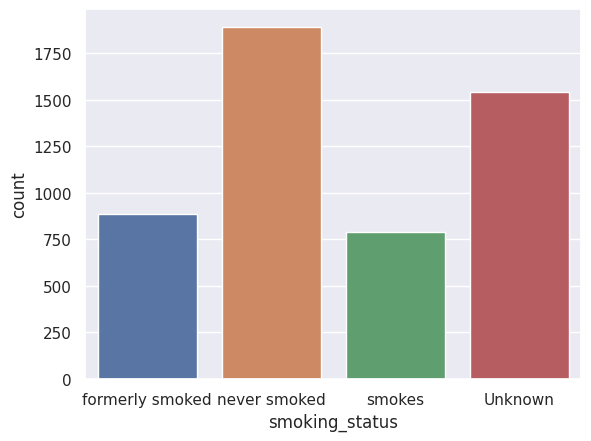

In [ ]:
sns.countplot(x = strokes['smoking_status'])

In [ ]:
strokes['bmi'].fillna(strokes['bmi'].mean(), inplace = True)

In [ ]:
strokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
x = strokes.iloc[:,:-1]
y = strokes.iloc[:,-1]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0,4,5,6,9])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
print(x)

[[  0.           1.           0.         ...   1.         228.69
   36.6       ]
 [  1.           0.           0.         ...   0.         202.21
   28.89323691]
 [  0.           1.           0.         ...   1.         105.92
   32.5       ]
 ...
 [  1.           0.           0.         ...   0.          82.99
   30.6       ]
 [  0.           1.           0.         ...   0.         166.29
   25.6       ]
 [  1.           0.           0.         ...   0.          85.28
   26.2       ]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_1 = sc.fit_transform(x_train)
x_test_1 = sc.fit_transform(x_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
svm=SVC(random_state=42)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_acc = accuracy_score(svm_pred, y_test)
svm_acc


0.9413145539906104

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
dt_pred = decision_tree.predict(x_test)
dt_acc = accuracy_score(dt_pred, y_test)
dt_acc

0.9115805946791862

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 25)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_acc = accuracy_score(rf_pred, y_test)
rf_acc

0.935054773082942

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(knn_pred, y_test)
knn_acc

0.9366197183098591

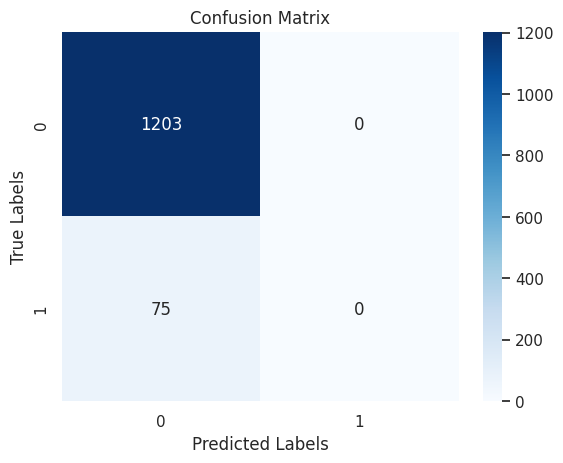

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

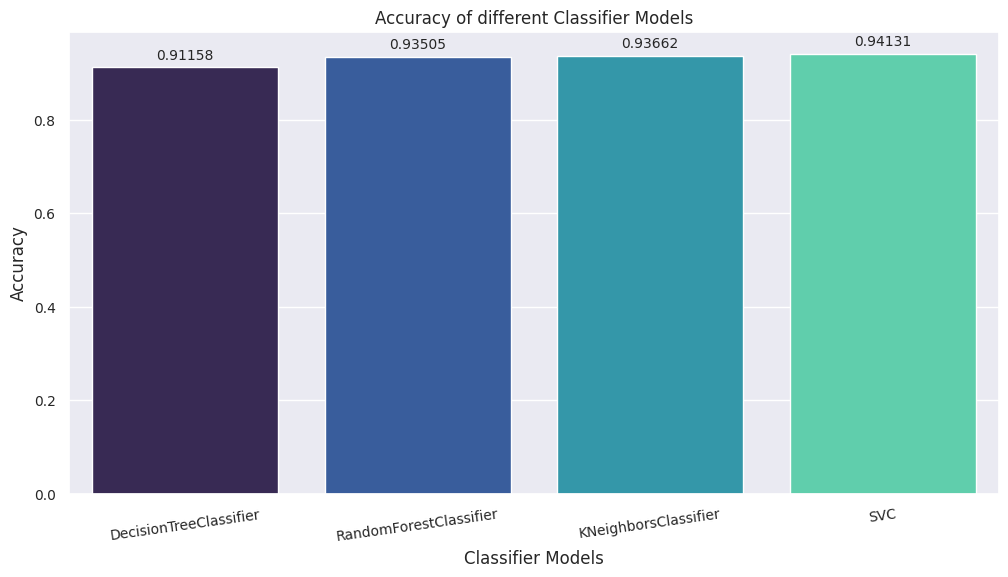

In [ ]:
models_names = ['DecisionTreeClassifier','RandomForestClassifier',
                    'KNeighborsClassifier','SVC']
models_acc=[dt_acc,rf_acc,knn_acc,svm_acc]

plt.rcParams['figure.figsize']=12,6
ax = sns.barplot(x=models_names, y=models_acc, palette = "mako", saturation =1.5)
plt.xlabel('Classifier Models' )
plt.ylabel('Accuracy')
plt.title('Accuracy of different Classifier Models')
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 10)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,5)}', (x + width/2, y + height*1.02), ha='center', fontsize = 10)
plt.show()